# The Tic Tac Toe-Project

#### 1. Human vs. Human: Text-based Approach
#### 2. Human vs. Human: Pygame GUI
#### 3. Human vs. Computer: Hard-coded Strategies
#### 4. Human vs. Computer: Reinforcement Learning

## 1. Human vs. Human: Text-based Approach

In [1]:
# Create list with nine empty spaces

board = [" " for i in range(0, 9)]

In [2]:
# Function that displays the tic tac toe board
# row1-3 are strings in which the numbers from specific positions in the board list are being stored

def print_board():
    row1 = "| {} | {} | {} |".format(board[0], board[1], board[2])
    row2 = "| {} | {} | {} |".format(board[3], board[4], board[5])
    row3 = "| {} | {} | {} |".format(board[6], board[7], board[8])
    
    print("-------------")
    print(row1)
    print("-------------")
    print(row2)
    print("-------------")
    print(row3)
    print("-------------")
    print()

In [3]:
# Function player's actions

def player_move(icon):
    if icon == "X": 
        number = 1
    elif icon == "O": 
        number = 2
    print("Your turn, player {}".format(number))

    while True:
        try:
            choice = int(input("Enter your move (1-9): "))
            if choice < 1 or choice > 9:
                print("Invalid. Please enter a number between 1 and 9.")
                continue
            elif board[choice - 1] == " ":
                board[choice - 1] = icon
                break
            else:
                print("Space already taken. Please try again.")
        except ValueError:
            print("Invalid. Please enter a number between 1 and 9.")

In [4]:
# Function of winning scenarios: A player has three icons in a row

def is_victory(icon):
    if (board[0] == icon and board[1] == icon and board[2] == icon) or \
       (board[3] == icon and board[4] == icon and board[5] == icon) or \
       (board[6] == icon and board[7] == icon and board[8] == icon) or \
       (board[0] == icon and board[3] == icon and board[6] == icon) or \
       (board[1] == icon and board[4] == icon and board[7] == icon) or \
       (board[2] == icon and board[5] == icon and board[8] == icon) or \
       (board[0] == icon and board[4] == icon and board[8] == icon) or \
       (board[2] == icon and board[4] == icon and board[6] == icon):
        return True
    else:
        return False

In [5]:
# Function of draw scenario: No more empty spaces on the board (and no player has three icons in a row)

def is_draw():
    if " " not in board:
        return True
    else:
        return False

In [6]:
# Main game loop with alternating turns between X and O, as well as game ending scenarios
# while loop only terminates in case of winning or draw scenario for any player

while True:
    print_board()
    player_move("X")
    print_board()
    if is_victory("X"):
        print("X wins! Congratulations!")
        break
    elif is_draw():
        print("It's a draw!")
        break
    
    player_move("O")
    if is_victory("O"):
        print_board()
        print("O wins! Congratulations!")
        break
    elif is_draw():
        print("It's a draw!")
        break

Enter your move (1-9): 1
-------------
| X |   |   |
-------------
|   |   |   |
-------------
|   |   |   |
-------------

Your turn, player 2
Enter your move (1-9): 2
-------------
| X | O |   |
-------------
|   |   |   |
-------------
|   |   |   |
-------------

Your turn, player 1
Enter your move (1-9): 4
-------------
| X | O |   |
-------------
| X |   |   |
-------------
|   |   |   |
-------------

Your turn, player 2
Enter your move (1-9): 5
-------------
| X | O |   |
-------------
| X | O |   |
-------------
|   |   |   |
-------------

Your turn, player 1
Enter your move (1-9): 7
-------------
| X | O |   |
-------------
| X | O |   |
-------------
| X |   |   |
-------------

X wins! Congratulations!


## 2. Human vs. Human: Pygame GUI

In [7]:
import pygame as pg
from pygame.locals import *
import sys
import time
import os
import cv2
import matplotlib.pyplot as plt

pygame 2.6.1 (SDL 2.28.4, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [8]:
# Initializing global variables

XO = 'x'
winner = None
draw = None

# Game board
width = 400
height = 400
white_background = (255, 255, 255)
black_lines = (0, 0, 0)
board = [[None]*3, [None]*3, [None]*3]

In [9]:
# Initializing the pygame board
# Images can be downloaded from github repository

pg.init()
fps = 30
CLOCK = pg.time.Clock()

# Display settings and caption
screen = pg.display.set_mode((width, height + 100), 0, 32)
pg.display.set_caption("Tic Tac Toe")

# Loading and resizing images
desktop_path = os.path.expanduser("C://Users//Tim//Desktop")
initiating_window = pg.image.load(os.path.join(desktop_path, "cover.png"))
x_img = pg.image.load(os.path.join(desktop_path, "x.png"))
y_img = pg.image.load(os.path.join(desktop_path, "o.png"))

initiating_window = pg.transform.scale(
initiating_window, (width, height + 100))
x_img = pg.transform.scale(x_img, (80, 80))
o_img = pg.transform.scale(y_img, (80, 80))

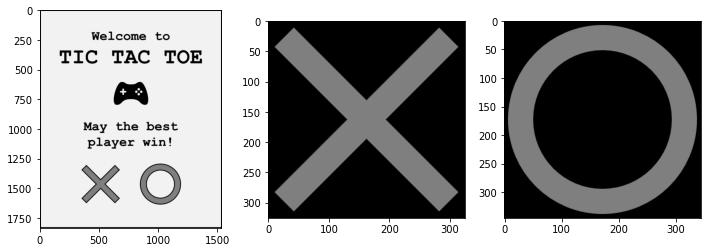

In [10]:
# Display images in notebook

x_img_show = cv2.imread(os.path.join(desktop_path, "x.png"))
o_img_show = cv2.imread(os.path.join(desktop_path, "o.png"))
initiating_window_show = cv2.imread(os.path.join(desktop_path, "cover.png"))

plt.figure(figsize = (12, 4))
plt.subplot(1, 3, 1)
plt.imshow(initiating_window_show)
plt.subplot(1, 3, 2)
plt.imshow(x_img_show)
plt.subplot(1, 3, 3)
plt.imshow(o_img_show)

In [11]:
def game_initiating_window():

# Displaying over the screen
    screen.blit(initiating_window, (0, 0))

# Updating the display
    pg.display.update()
    time.sleep(3)
    screen.fill(white_background)

# Drawing vertical and lines
    pg.draw.line(screen, black_lines, (width / 3, 0), (width / 3, height), 7)
    pg.draw.line(screen, black_lines, (width / 3 * 2, 0), (width / 3 * 2, height), 7)
    pg.draw.line(screen, black_lines, (0, height / 3), (width, height / 3), 7)
    pg.draw.line(screen, black_lines, (0, height / 3 * 2), (width, height / 3 * 2), 7)
    draw_status()

In [12]:
# Function for depicting game status below the board

def draw_status():
    global draw

    if winner is None:
        message = XO.upper() + "'s Turn"
    else:
        message = winner.upper() + " won!"
    
    if draw:
        message = "Game Draw!"

    # Block with text describing game status
    font = pg.font.Font(None, 30)
    text = font.render(message, 1, (255, 255, 255))
    screen.fill((0, 0, 0), (0, 400, 500, 100))
    text_rect = text.get_rect(center = (width / 2, 500 - 50))
    screen.blit(text, text_rect)
    pg.display.update()

In [13]:
# Function of winning scenarios: A player has three icons in a row

def check_win():
    global board, winner, draw

    # Checking for horizontal winner
    for row in range(0, 3):
        if((board[row][0] == board[row][1] == board[row][2]) and (board[row][0] is not None)):
            winner = board[row][0]
            pg.draw.line(screen, (250, 0, 0),
                        (0, (row + 1) * height / 3 - height / 6),
                        (width, (row + 1) * height / 3 - height / 6), 4)
            break

    # Checking for vertical winner
    for col in range(0, 3):
        if((board[0][col] == board[1][col] == board[2][col]) and (board[0][col] is not None)):
            winner = board[0][col]
            pg.draw.line(screen, (250, 0, 0), ((col + 1) * width / 3 - width / 6, 0),
                        ((col + 1) * width / 3 - width / 6, height), 4)
            break

    # Checking for diagonal winner
    if (board[0][0] == board[1][1] == board[2][2]) and (board[0][0] is not None):
        winner = board[0][0]
        pg.draw.line(screen, (250, 70, 70), (50, 50), (350, 350), 4)

    if (board[0][2] == board[1][1] == board[2][0]) and (board[0][2] is not None):
        winner = board[0][2]
        pg.draw.line(screen, (250, 70, 70), (350, 50), (50, 350), 4)

    if(all([all(row) for row in board]) and winner is None):
        draw = True

    draw_status()

In [14]:
# Function for positioning the X and O symbols on the pygame board

def drawXO(row, col):
    global board, XO

    # For the first row, the image should be pasted at a x coordinate of 30 from the left margin
    # For the second row, the image should be pasted at a x coordinate of 30 from the game line, etc.
    if row == 1:
        posx = 30
    if row == 2:
        posx = width / 3 + 30
    if row == 3:
        posx = width / 3 * 2 + 30
    if col == 1:
        posy = 30
    if col == 2:
        posy = height / 3 + 30
    if col == 3:
        posy = height / 3 * 2 + 30

    board[row - 1][col - 1] = XO

    if(XO == 'x'):
        screen.blit(x_img, (posy, posx))
        XO = 'o'
    else:
        screen.blit(o_img, (posy, posx))
        XO = 'x'
    pg.display.update()

In [15]:
# Function for getting coordinates of user's mouse clicks

def user_click():
    x, y = pg.mouse.get_pos()

    # Get column of mouse click
    if(x < width / 3):
        col = 1
    elif (x < width / 3 * 2):
        col = 2
    elif(x < width):
        col = 3
    else:
        col = None

    # Get row of mouse click
    if(y < height / 3):
        row = 1
    elif (y < height / 3 * 2):
        row = 2
    elif(y < height):
        row = 3
    else:
        row = None

    # Place X and O images accordingly
    if(row and col and board[row - 1][col - 1] is None):
        global XO

    drawXO(row, col)
    check_win()

In [16]:
# Function for resetting the game (i.e., all global game variables) after game ends (i.e., win or draw)

def reset_game():
    global board, winner, XO, draw
    time.sleep(3)
    XO = 'x'
    draw = False
    game_initiating_window()
    winner = None
    board = [[None]*3, [None]*3, [None]*3]

game_initiating_window()

while(True):
    for event in pg.event.get():

        if event.type == QUIT:
            pg.quit()
            sys.exit()

        elif event.type == MOUSEBUTTONDOWN:
            user_click()

            if(winner or draw):
                reset_game()

    pg.display.update()
    CLOCK.tick(fps)

SystemExit: 

C:\Users\Tim\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## 3. Human vs. Computer: Hard-coded Strategies

In [17]:
import random

# Create list with nine empty spaces
board = [" " for i in range(9)]

# Function that displays the tic tac toe board
def print_board():
    row1 = "| {} | {} | {} |".format(board[0], board[1], board[2])
    row2 = "| {} | {} | {} |".format(board[3], board[4], board[5])
    row3 = "| {} | {} | {} |".format(board[6], board[7], board[8])
    
    print("-------------")
    print(row1)
    print("-------------")
    print(row2)
    print("-------------")
    print(row3)
    print("-------------")
    print()

# Function for human player's move
def player_move():
    while True:
        try:
            choice = int(input("Enter your move (1-9): "))
            if choice < 1 or choice > 9:
                print("Invalid. Please enter a number between 1 and 9.")
                continue
            elif board[choice - 1] == " ":
                board[choice - 1] = "X"
                break
            else:
                print("Space already taken. Please try again.")
        except ValueError:
            print("Invalid input. Please enter a number between 1 and 9.")

# Function for computer's move with hard-coded strategies
def computer_move():
    # 1. Check for a winning move
    for i in range(9):
        if board[i] == " ":
            board[i] = "O"
            if is_victory("O"):
                return
            board[i] = " "

    # 2. Block human player's winning move
    for i in range(9):
        if board[i] == " ":
            board[i] = "X"
            if is_victory("X"):
                board[i] = "O"
                return
            board[i] = " "

    # 3. Take the center if available
    if board[4] == " ":
        board[4] = "O"
        return

    # 4. Take one of the corners if available
    for i in [0, 2, 6, 8]:
        if board[i] == " ":
            board[i] = "O"
            return

    # 5. Otherwise, take one of the sides
    for i in [1, 3, 5, 7]:
        if board[i] == " ":
            board[i] = "O"
            return
            
# Function to determine if a player has won
def is_victory(icon):
    return ((board[0] == icon and board[1] == icon and board[2] == icon) or
            (board[3] == icon and board[4] == icon and board[5] == icon) or
            (board[6] == icon and board[7] == icon and board[8] == icon) or
            (board[0] == icon and board[3] == icon and board[6] == icon) or
            (board[1] == icon and board[4] == icon and board[7] == icon) or
            (board[2] == icon and board[5] == icon and board[8] == icon) or
            (board[0] == icon and board[4] == icon and board[8] == icon) or
            (board[2] == icon and board[4] == icon and board[6] == icon))

# Function to check for a draw (i.e., no empty spaces left)
def is_draw():
    return " " not in board

# Main game loop
while True:
    print_board()
    player_move()
    if is_victory("X"):
        print_board()
        print("X wins! Congratulations!")
        break
    elif is_draw():
        print_board()
        print("It's a draw!")
        break

    computer_move()
    if is_victory("O"):
        print_board()
        print("O wins! Better luck next time!")
        break
    elif is_draw():
        print_board()
        print("It's a draw!")
        break

-------------
|   |   |   |
-------------
|   |   |   |
-------------
|   |   |   |
-------------

Enter your move (1-9): 1
-------------
| X |   |   |
-------------
|   | O |   |
-------------
|   |   |   |
-------------

Enter your move (1-9): 2
-------------
| X | X | O |
-------------
|   | O |   |
-------------
|   |   |   |
-------------

Enter your move (1-9): 4
-------------
| X | X | O |
-------------
| X | O |   |
-------------
| O |   |   |
-------------

O wins! Better luck next time!


## 4. Human vs. Computer: Reinforcement Learning (Q-Learning)

In [18]:
import random

# Helper Functions

def get_state(board):
    return ''.join(board)

def available_actions(board):
    return [i for i, cell in enumerate(board) if cell == ' ']

def is_victory(board, icon):
    return ((board[0] == board[1] == board[2] == icon) or
            (board[3] == board[4] == board[5] == icon) or
            (board[6] == board[7] == board[8] == icon) or
            (board[0] == board[3] == board[6] == icon) or
            (board[1] == board[4] == board[7] == icon) or
            (board[2] == board[5] == board[8] == icon) or
            (board[0] == board[4] == board[8] == icon) or
            (board[2] == board[4] == board[6] == icon))

def is_draw(board):
    return " " not in board

def print_board(board):
    row1 = "| {} | {} | {} |".format(board[0], board[1], board[2])
    row2 = "| {} | {} | {} |".format(board[3], board[4], board[5])
    row3 = "| {} | {} | {} |".format(board[6], board[7], board[8])
    print("-------------")
    print(row1)
    print("-------------")
    print(row2)
    print("-------------")
    print(row3)
    print("-------------")
    print()

# Q-Learning Training Function

def train_agent(episodes = 50000, epsilon = 0.2, alpha = 0.3, gamma = 0.9):
    Q = {}
    
    for ep in range(episodes):
        board = [" "] * 9
        done = False
        
        # For training, let the opponent (X) go first:
        if available_actions(board):
            opp_action = random.choice(available_actions(board))
            board[opp_action] = "X"
        
        while not done:
            # Agent's Turn (playing as 'O')
            state = get_state(board)
            actions = available_actions(board)
            if not actions:
                break
            # Initialize Q values for this state if not present
            if state not in Q:
                Q[state] = {a: 0 for a in actions}
            # Epsilon-greedy action selection:
            if random.random() < epsilon:
                action = random.choice(actions)
            else:
                # Greedy selection: choose the move with highest Q value
                q_values = Q[state]
                max_q = max(q_values.get(a, 0) for a in actions)
                best_actions = [a for a in actions if q_values.get(a, 0) == max_q]
                action = random.choice(best_actions)
            
            # Agent makes its move:
            board[action] = "O"
            
            # Check for terminal state after agent's move:
            if is_victory(board, "O"):
                reward = 1
                next_state = get_state(board)
                Q[state][action] = Q[state][action] + alpha * (reward - Q[state][action])
                done = True
                continue
            if is_draw(board):
                reward = 0
                next_state = get_state(board)
                Q[state][action] = Q[state][action] + alpha * (reward - Q[state][action])
                done = True
                continue
            
            # Opponent's Turn (playing as 'X')
            opp_actions = available_actions(board)
            if opp_actions:
                opp_move = random.choice(opp_actions)
                board[opp_move] = "X"
                # Check if opponent wins:
                if is_victory(board, "X"):
                    reward = -1
                    next_state = get_state(board)
                    Q[state][action] = Q[state][action] + alpha * (reward - Q[state][action])
                    done = True
                    continue
                if is_draw(board):
                    reward = 0
                    next_state = get_state(board)
                    Q[state][action] = Q[state][action] + alpha * (reward - Q[state][action])
                    done = True
                    continue
            
            # Update Q-value for the agent's move
            next_state = get_state(board)
            next_actions = available_actions(board)
            # Ensure the next state is in Q table:
            if next_state not in Q:
                Q[next_state] = {a: 0 for a in next_actions}
            else:
                for a in next_actions:
                    if a not in Q[next_state]:
                        Q[next_state][a] = 0
            max_next = max(Q[next_state].values()) if Q[next_state] else 0
            reward = 0  # no immediate reward on non-terminal move
            Q[state][action] = Q[state][action] + alpha * (reward + gamma * max_next - Q[state][action])
    
    return Q

# Play Against the Trained Agent

def play_against_agent(Q):
    board = [" "] * 9
    print("Welcome to Tic Tac Toe! You are X and the computer is O.")
    
    # Let the human (X) start:
    while True:
        print_board(board)
        # Human move:
        while True:
            try:
                move = int(input("Enter your move (1-9): ")) - 1
                if move not in available_actions(board):
                    print("Invalid move. Try again.")
                else:
                    board[move] = "X"
                    break
            except ValueError:
                print("Please enter a valid number between 1 and 9.")
        
        if is_victory(board, "X"):
            print_board(board)
            print("Congratulations, you win!")
            return
        if is_draw(board):
            print_board(board)
            print("It's a draw!")
            return
        
        # Computer's turn:
        state = get_state(board)
        actions = available_actions(board)
        if state in Q:
            # Use the learned Q-values to select the best move
            state_q = Q[state]
            best_val = -float('inf')
            best_moves = []
            for a in actions:
                q_val = state_q.get(a, 0)
                if q_val > best_val:
                    best_val = q_val
                    best_moves = [a]
                elif q_val == best_val:
                    best_moves.append(a)
            comp_move = random.choice(best_moves)
        else:
            comp_move = random.choice(actions)
        
        board[comp_move] = "O"
        if is_victory(board, "O"):
            print_board(board)
            print("Computer wins! Better luck next time.")
            return
        if is_draw(board):
            print_board(board)
            print("It's a draw!")
            return

# Main Program

if __name__ == '__main__':
    print("Training the agent, please wait...")
    Q = train_agent(episodes = 50000, epsilon = 0.2, alpha = 0.3, gamma = 0.9)
    print("Training completed!\n")
    play_against_agent(Q)

Training the agent, please wait...
Training completed!

Welcome to Tic Tac Toe! You are X and the computer is O.
-------------
|   |   |   |
-------------
|   |   |   |
-------------
|   |   |   |
-------------

Enter your move (1-9): 1
-------------
| X |   |   |
-------------
|   | O |   |
-------------
|   |   |   |
-------------

Enter your move (1-9): 2
-------------
| X | X | O |
-------------
|   | O |   |
-------------
|   |   |   |
-------------

Enter your move (1-9): 7
-------------
| X | X | O |
-------------
| O | O |   |
-------------
| X |   |   |
-------------

Enter your move (1-9): 8
-------------
| X | X | O |
-------------
| O | O | O |
-------------
| X | X |   |
-------------

Computer wins! Better luck next time.
